## Extractive Text Summarization 

NOTE - 
- Extractive summarization selects and extracts important content directly from the source text.
- Abstractive summarization generates new sentences to convey the main ideas of the original text in a condensed form.

### METHOD 1 (without feature representations)
`Pipeline for developing sentiment analysis task`

- Data Acquisition 
- Data Preprocessing (Text Preparation)
- Sentence Tokenization
- Word Tokenization
- Word-Frequency Table
- Summarization

### Import necessary libraries and read the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

In [45]:
text = ''' Millions go missing at China bank. 
Two senior officials at one of China's top commercial banks have reportedly disappeared after funds worth up to $120m (£64m) went missing. 
The pair both worked at Bank of China in the northern city of Harbin, the South China Morning Post reported. 
The latest scandal at Bank of China will do nothing to reassure foreign investors that China's big four banks are ready for international listings. 
Government policy sees the bank listings as vital economic reforms. 
Bank of China is one of two frontrunners in the race to list overseas. 
The other is China Construction Bank. 
Both are expected to list abroad during 2005. 
They shared a $45bn state bailout in 2003, to help clean up their balance sheets in preparation for a foreign stock market debut.
However, a report in the China-published Economic Observer said on Monday that the two banks may have scrapped plans to list in New York because of the cost of meeting regulatory requirements imposed since the Enron scandal. 
Bank of China is the country's biggest foreign exchange dealer, while China Construction Bank is the largest deposit holder. 
China's banking sector is burdened with at least $190bn of bad debt according to official data, though most observers believe the true figure is far higher. 
Officially, one in five loans is not being repaid. 
Attempts to strengthen internal controls and tighten lending policies have uncovered a succession of scandals involving embezzlement by bank
officials and loans-for-favours. 
The most high-profile case involved the ex-president of Bank of China, Wang Xuebing, jailed for 12 years in 2003. 
Although, he committed the offences whilst running Bank of China in New York, Mr.Wang was head of China Construction Bank when the scandal broke.
Earlier this month, a China Construction Bank branch manager was jailed for life in a separate case. China's banks used to act as cash offices for state enterprises and did not require checks on credit worthiness.
The introduction of market reforms has been accompanied by attempts to modernize the banking sector, but links between banks and local government remain strong. 
Last year, China's premier, Wen Jiabao, targeted bank lending practices in a series of speeches, and regulators ordered all big loans to be scrutinized, in an attempt to cool down irresponsible lending. 
China's leaders see reforming the top four banks as vital to distribute capital to profitable companies and protect the health of China's economic boom. 
But two problems persist. 
First, inefficient state enterprises continue to receive protection from bankruptcy because they employ large numbers of people. 
Second, many questionable loans come not from the big four, but from smaller banks. 
Another high-profile financial firm, China Life, is facing shareholder lawsuits and a probe by the US Securities and Exchange Commission following its 2004 New York listing over its failure to disclose accounting irregularities at its parent company.'''

In [108]:
expected = '''
The other is China Construction Bank. The latest scandal at Bank of China will do nothing to reassure
foreign investors that China's big four banks are ready for international listings. Bank of China is the
country's biggest foreign exchange dealer, while China Construction Bank is the largest deposit holder.
Bank of China is one of two frontrunners in the race to list overseas. Although, he committed the
offences whilst running Bank of China in New York, Mr.Wang was head of China Construction Bank
when the scandal broke. Earlier this month, a China Construction Bank branch manager was jailed for
life in a separate case. The pair both worked at Bank of China in the northern city of Harbin, the South
China Morning Post reported. The most high-profile case involved the ex-president of Bank of China,
Wang Xuebing, jailed for 12 years in 2003.Two senior officials at one of China's top commercial banks
have reportedly disappeared after funds worth up to $120m (£64m) went missing. China’s banks used
to act as cash offices for state enterprises and did not require checks on credit worthiness.
'''

### Text Cleaning

- Tokenization
- Punctuation Removal
- Lowercasing
- Stop Word Removal

In [109]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)

In [110]:
doc[:100], type(doc)

( Millions go missing at China bank. 
 Two senior officials at one of China's top commercial banks have reportedly disappeared after funds worth up to $120m (£64m) went missing. 
 The pair both worked at Bank of China in the northern city of Harbin, the South China Morning Post reported. 
 The latest scandal at Bank of China will do nothing to reassure foreign investors that China's big four banks are ready for international listings. 
 Government policy sees the bank listings as vital economic reforms,
 spacy.tokens.doc.Doc)

`Tokenization`

In [111]:
tokens = [token.text for token in doc]

In [112]:
print(tokens[:10])

[' ', 'Millions', 'go', 'missing', 'at', 'China', 'bank', '.', '\n', 'Two']


`Punctuation Removal`

In [113]:
from string import punctuation
print(punctuation) # add \n to punctuations

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [114]:
punctuation += '\n' 
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n'

In [115]:
tokens = [token for token in tokens if token not in punctuation]
print(tokens[:10])

[' ', 'Millions', 'go', 'missing', 'at', 'China', 'bank', 'Two', 'senior', 'officials']


`Lowercasing`

In [116]:
tokens = [token.lower() for token in tokens]
print(tokens[:10])

[' ', 'millions', 'go', 'missing', 'at', 'china', 'bank', 'two', 'senior', 'officials']


`Stop Word Removal`

In [117]:
from spacy.lang.en import STOP_WORDS
stopwords = list(STOP_WORDS)
stopwords[:6]

['bottom', 'forty', 'became', 'off', 'in', 'on']

In [118]:
tokens = [token for token in tokens if token not in stopwords]
print(tokens[:10])

[' ', 'millions', 'missing', 'china', 'bank', 'senior', 'officials', 'china', 'commercial', 'banks']


### Word Frequency and Sentence Frequency

`Word Frequency`

In [119]:
word_freq = {}
for word in tokens:
    if word not in word_freq:
        word_freq[word] = 1
    else:
        word_freq[word] += 1

In [120]:
print(word_freq)

{' ': 1, 'millions': 1, 'missing': 2, 'china': 21, 'bank': 14, 'senior': 1, 'officials': 2, 'commercial': 1, 'banks': 7, 'reportedly': 1, 'disappeared': 1, 'funds': 1, 'worth': 1, '120': 1, 'm': 2, '£': 1, '64': 1, 'went': 1, 'pair': 1, 'worked': 1, 'northern': 1, 'city': 1, 'harbin': 1, 'south': 1, 'morning': 1, 'post': 1, 'reported': 1, 'latest': 1, 'scandal': 3, 'reassure': 1, 'foreign': 3, 'investors': 1, 'big': 3, 'ready': 1, 'international': 1, 'listings': 2, 'government': 2, 'policy': 1, 'sees': 1, 'vital': 2, 'economic': 3, 'reforms': 2, 'frontrunners': 1, 'race': 1, 'list': 3, 'overseas': 1, 'construction': 4, 'expected': 1, 'abroad': 1, '2005': 1, 'shared': 1, '45bn': 1, 'state': 3, 'bailout': 1, '2003': 2, 'help': 1, 'clean': 1, 'balance': 1, 'sheets': 1, 'preparation': 1, 'stock': 1, 'market': 2, 'debut': 1, 'report': 1, 'published': 1, 'observer': 1, 'said': 1, 'monday': 1, 'scrapped': 1, 'plans': 1, 'new': 3, 'york': 3, 'cost': 1, 'meeting': 1, 'regulatory': 1, 'requireme

In [121]:
# max freq word 
max_freq = max(word_freq.values())
max_freq_word = [word for word, freq in word_freq.items() if freq == max_freq]
print(max_freq_word, max_freq)

['china'] 21


In [122]:
# normalize the frequencies 
for word in word_freq:
    word_freq[word] = word_freq[word] / max_freq
print(word_freq)

{' ': 0.047619047619047616, 'millions': 0.047619047619047616, 'missing': 0.09523809523809523, 'china': 1.0, 'bank': 0.6666666666666666, 'senior': 0.047619047619047616, 'officials': 0.09523809523809523, 'commercial': 0.047619047619047616, 'banks': 0.3333333333333333, 'reportedly': 0.047619047619047616, 'disappeared': 0.047619047619047616, 'funds': 0.047619047619047616, 'worth': 0.047619047619047616, '120': 0.047619047619047616, 'm': 0.09523809523809523, '£': 0.047619047619047616, '64': 0.047619047619047616, 'went': 0.047619047619047616, 'pair': 0.047619047619047616, 'worked': 0.047619047619047616, 'northern': 0.047619047619047616, 'city': 0.047619047619047616, 'harbin': 0.047619047619047616, 'south': 0.047619047619047616, 'morning': 0.047619047619047616, 'post': 0.047619047619047616, 'reported': 0.047619047619047616, 'latest': 0.047619047619047616, 'scandal': 0.14285714285714285, 'reassure': 0.047619047619047616, 'foreign': 0.14285714285714285, 'investors': 0.047619047619047616, 'big': 

`Sentence Frequency`

In [123]:
sent_tokens = [sent for sent in doc.sents]
print(sent_tokens[:3])

[ Millions go missing at China bank. 
, Two senior officials at one of China's top commercial banks have reportedly disappeared after funds worth up to $120m (£64m) went missing. 
, The pair both worked at Bank of China in the northern city of Harbin, the South China Morning Post reported. 
]


In [124]:
sent_freq = {}
for sent in sent_tokens:
    for word, freq in word_freq.items():
        if word in sent.text.lower():
            if sent not in sent_freq:
                sent_freq[sent] = freq
            else:
                sent_freq[sent] += freq

In [125]:
sent_freq

{ Millions go missing at China bank. : 1.9523809523809526,
 Two senior officials at one of China's top commercial banks have reportedly disappeared after funds worth up to $120m (£64m) went missing. : 3.0476190476190452,
 The pair both worked at Bank of China in the northern city of Harbin, the South China Morning Post reported. : 2.285714285714285,
 The latest scandal at Bank of China will do nothing to reassure foreign investors that China's big four banks are ready for international listings. : 2.999999999999999,
 Government policy sees the bank listings as vital economic reforms. : 1.6190476190476188,
 Bank of China is one of two frontrunners in the race to list overseas. : 2.0,
 The other is China Construction Bank. : 1.9047619047619049,
 Both are expected to list abroad during 2005. : 0.38095238095238093,
 They shared a $45bn state bailout in 2003, to help clean up their balance sheets in preparation for a foreign stock market debut.: 1.0952380952380956,
 However, a report in the

In [126]:
len(sent_freq)

25

### Summarization

In [127]:
from heapq import nlargest 
summary = nlargest(10, sent_freq, key = sent_freq.get)

In [128]:
summary

[However, a report in the China-published Economic Observer said on Monday that the two banks may have scrapped plans to list in New York because of the cost of meeting regulatory requirements imposed since the Enron scandal. ,
 Two senior officials at one of China's top commercial banks have reportedly disappeared after funds worth up to $120m (£64m) went missing. ,
 The latest scandal at Bank of China will do nothing to reassure foreign investors that China's big four banks are ready for international listings. ,
 Last year, China's premier, Wen Jiabao, targeted bank lending practices in a series of speeches, and regulators ordered all big loans to be scrutinized, in an attempt to cool down irresponsible lending. ,
 Although, he committed the offences whilst running Bank of China in New York, Mr.Wang was head of China Construction Bank when the scandal broke.,
 Another high-profile financial firm, China Life, is facing shareholder lawsuits and a probe by the US Securities and Exchang

In [129]:
final_summary = [word.text for word in summary]
summary = ' '.join(final_summary)
print(summary)

However, a report in the China-published Economic Observer said on Monday that the two banks may have scrapped plans to list in New York because of the cost of meeting regulatory requirements imposed since the Enron scandal. 
 Two senior officials at one of China's top commercial banks have reportedly disappeared after funds worth up to $120m (£64m) went missing. 
 The latest scandal at Bank of China will do nothing to reassure foreign investors that China's big four banks are ready for international listings. 
 Last year, China's premier, Wen Jiabao, targeted bank lending practices in a series of speeches, and regulators ordered all big loans to be scrutinized, in an attempt to cool down irresponsible lending. 
 Although, he committed the offences whilst running Bank of China in New York, Mr.Wang was head of China Construction Bank when the scandal broke.
 Another high-profile financial firm, China Life, is facing shareholder lawsuits and a probe by the US Securities and Exchange Comm

### Accuracy

In [130]:
import rouge
from rouge import Rouge

rouge = Rouge()
scores = rouge.get_scores(expected, summary)
score = scores[0]['rouge-1']['f'] 
print('Rouge Score : ',score)

Rouge Score :  0.5685618681178064


In [131]:
from difflib import SequenceMatcher

matcher = SequenceMatcher(None, summary, expected)
similarity_ratio = matcher.ratio()

print(f"Similarity ratio: {similarity_ratio}")

Similarity ratio: 0.1136281912980942


### METHOD 2 (with feature representations)

`Pipeline for developing sentiment analysis task`

- Data Acquisition 
- Text Preparation
- Feature Representation
- Summarization

### Import necessary libraries

In [132]:
from gensim.utils import simple_preprocess  # simple_preprocess is a function in gensim that performs tokenization (splits the text into individual words), transforms all words to lowercase, and removes punctuation and words that are too short or too long. 
from gensim.parsing.preprocessing import remove_stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models.word2vec import Word2Vec
from gensim.models import FastText

### Text Preprocessing

In [133]:
text

" Millions go missing at China bank. \nTwo senior officials at one of China's top commercial banks have reportedly disappeared after funds worth up to $120m (£64m) went missing. \nThe pair both worked at Bank of China in the northern city of Harbin, the South China Morning Post reported. \nThe latest scandal at Bank of China will do nothing to reassure foreign investors that China's big four banks are ready for international listings. \nGovernment policy sees the bank listings as vital economic reforms. \nBank of China is one of two frontrunners in the race to list overseas. \nThe other is China Construction Bank. \nBoth are expected to list abroad during 2005. \nThey shared a $45bn state bailout in 2003, to help clean up their balance sheets in preparation for a foreign stock market debut.\nHowever, a report in the China-published Economic Observer said on Monday that the two banks may have scrapped plans to list in New York because of the cost of meeting regulatory requirements impos

In [134]:
sentences = text.split('\n')
original_sentences = sentences.copy()
sentences[:3]

[' Millions go missing at China bank. ',
 "Two senior officials at one of China's top commercial banks have reportedly disappeared after funds worth up to $120m (£64m) went missing. ",
 'The pair both worked at Bank of China in the northern city of Harbin, the South China Morning Post reported. ']

In [135]:
lemma = WordNetLemmatizer()

def preprocess(text):
    text = simple_preprocess(remove_stopwords(text))
    return [lemma.lemmatize(str(word)) for word in text]

sentences = [preprocess(sent) for sent in sentences]
sentences[:3]

[['million', 'missing', 'china', 'bank'],
 ['two',
  'senior',
  'official',
  'china',
  'commercial',
  'bank',
  'reportedly',
  'disappeared',
  'fund',
  'worth',
  'went',
  'missing'],
 ['the',
  'pair',
  'worked',
  'bank',
  'china',
  'northern',
  'city',
  'harbin',
  'south',
  'china',
  'morning',
  'post',
  'reported']]

In [136]:
len(processed_text)

32

In [52]:
sentence_list = [' '.join(sentence) for sentence in sentences]

In [54]:
sentence_list[:2], sentences[:2], original_sentences[:2]

(['million missing china bank',
  'two senior official china commercial bank reportedly disappeared fund worth went missing'],
 [['million', 'missing', 'china', 'bank'],
  ['two',
   'senior',
   'official',
   'china',
   'commercial',
   'bank',
   'reportedly',
   'disappeared',
   'fund',
   'worth',
   'went',
   'missing']],
 [' Millions go missing at China bank. ',
  "Two senior officials at one of China's top commercial banks have reportedly disappeared after funds worth up to $120m (£64m) went missing. "])

### Feature Representations

`Bag of Words`

In [55]:
cv = CountVectorizer()
bow_matrix = cv.fit_transform(sentence_list).toarray()
bow_matrix.shape

(25, 203)

`TF IDF`

In [56]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(sentence_list).toarray()
tfidf_matrix.shape

(25, 203)

`CBOW`

The Word2Vec model expects a list of sentences, where each sentence is a list of words.  \
For example:\
sentences = [["this", "is", "the", "first", "sentence"], ["this", "is", "the", "second", "sentence"]]

In [57]:
cbow = Word2Vec(sentences, vector_size=100, window=5, min_count=2, sg=0)
vocab_cbow = cbow.wv.index_to_key 

In [58]:
def get_mean_vector(model, sentence):
    words = [word for word in sentence if word in vocab_cbow] # if word is not in vocab, it will be ignored
    if len(words) >= 1: 
        return np.mean(model.wv[words], axis=0) # mean of all the word vectors in the sentence, vector_size = 100(initialized earlier)
    return np.zeros((100,)) # return a vector of zeros if no words are in vocab

In [59]:
cbow_array = []

for sentence in sentences:
    mean_vec = get_mean_vector(cbow, sentence)
    cbow_array.append(mean_vec)
    
cbow_array = np.array(cbow_array)

In [60]:
cbow_array.shape

(25, 100)

`Skipgram`

In [61]:
sg = Word2Vec(sentences, vector_size=100, window=5, min_count=2, sg=1)
vocab_sg = sg.wv.index_to_key

In [62]:
sg_array = [] 

for sentence in sentences:
    sg_array.append(get_mean_vector(sg, sentence))
    
sg_array = np.array(sg_array)

In [63]:
sg_array.shape

(25, 100)

`GloVe`

In [25]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'

# Convert the GloVe file format to the Word2Vec file format
glove2word2vec(glove_input_file, word2vec_output_file)

# load the vectors
glove = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

C:\Temp\ipykernel_12000\171241091.py:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


In [64]:
vocab_glove = glove.key_to_index

In [65]:
def glove_mean_vector(model, sentence):
    words = [word for word in sentence if word in vocab_cbow] 
    if len(words) >= 1: return np.mean(model.wv[words], axis=0) 
    else: return []

In [66]:
glove_array = [] 

for sentence in sentences:
    glove_array.append(get_mean_vector(sg, sentence))
    
glove_array = np.array(glove_array)

`FastText`

In [67]:
fasttext = FastText(sentences, vector_size=100, window=5, min_count=2, sg=1)

In [68]:
fasttext_array = []

for sentence in sentences:
    mean_vec = get_mean_vector(cbow, sentence)
    fasttext_array.append(mean_vec)
    
fasttext_array = np.array(fasttext_array)

`Similarity - Cosine Distance`

In [69]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

In [100]:
def get_similar_sentences(n, embeddings, sent_index):
    neighbour = NearestNeighbors(n_neighbors=n+1, metric='cosine')
    neighbour.fit(embeddings)
    distances, rank = neighbour.kneighbors(embeddings[sent_index].reshape(1, -1))
    similar_sentences = [original_sentences[i] for i in rank[0]]
    print('\n','-'*1000)
    print(f"Original Sentence: {similar_sentences[0]}\n")
    print(f"Top {n} similar sentences : ")
    for i in range(len(similar_sentences)): 
        if i!=0:
            print(f"{i}. Distance : {distances[0][i] : .4f} - {similar_sentences[i]}")
    return '\n'.join(similar_sentences)

In [89]:
def get_summaries(matrices, num_sentences, index):
    summaries = []
    for matrix in matrices:
        summary = get_similar_sentences(num_sentences, matrix, index)
        summaries.append(summary)
    return summaries

In [104]:
matrices = [bow_matrix, tfidf_matrix, cbow_array, sg_array, glove_array, fasttext_array]
summaries = get_summaries(matrices, 5, 0)
# summaries = get_summaries(matrices, 5, 1)


 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

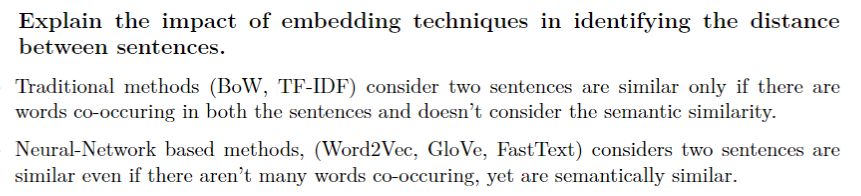

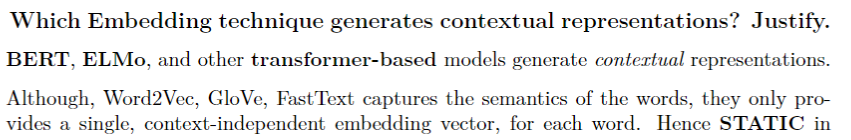
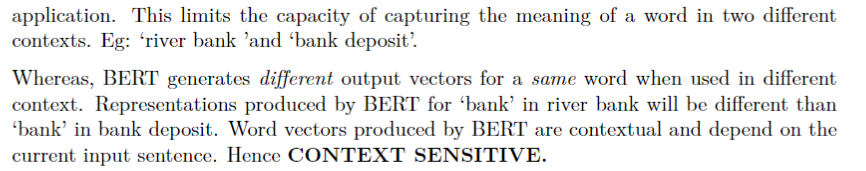